In [1]:
%load_ext autoreload
%autoreload 2

import builtins
import IPython.lib.deepreload
builtins.reload = IPython.lib.deepreload.reload # type: ignore

In [3]:
import sys
from functools import reduce
from operator import add
import matplotlib.pyplot as plt

import swcgeom
from swcgeom.analysis import draw
from swcgeom.transforms import TreeNormalizer

In [4]:
swc1 = "101711-10_4p5-of-16_initial.CNG.swc"
swc2 = "101711-11_16-of-16_initial.CNG.swc"

print tree: Neuron Tree with 161 nodes and 160 edges
print node: 1 1 7.7200 -20.9800 0.0000 22.3570 0
0 1 0.0000 0.0000 0.0000 22.3570 -1
1 1 7.7200 -20.9800 0.0000 22.3570 0
2 1 -7.7100 20.9700 0.0000 22.3570 0
Neuron tree with 160 segments, True
Neuron tree with 35 branches.
tips: 21


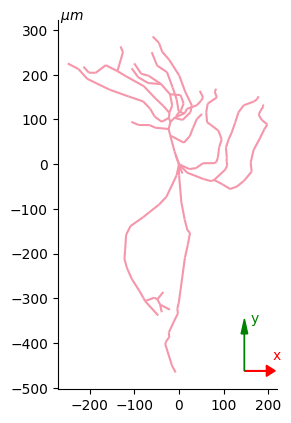

In [16]:
# create a tree
tree = swcgeom.Tree.from_swc(swc1)

# print tree
print("print tree:", tree)
print("print node:", tree[1])
for a in tree[:3]: print(a)

# generate swc file
# tree.to_swc("./test.swc")

segments = tree.get_segments()
eq = len(segments) == tree.number_of_edges()
print(f"Neuron tree with {len(segments)} segments,", eq)

branches = tree.get_branches()
print(f"Neuron tree with {len(branches)} branches.")

# collect tips
tips = tree.traverse(leave=lambda cur, children: max(1, reduce(add, children, 0)))
print(f"tips: {tips}")

# darw
ax, lines = draw(tree)

/home/celeste/src/swcgeom/swcgeom/transforms/tree.py:27: RuntimeWarning: divide by zero encountered in divide
  new_tree.ndata[key] = (new_tree.ndata[key] - v_min) / v_max
/home/celeste/src/swcgeom/swcgeom/transforms/tree.py:27: RuntimeWarning: invalid value encountered in divide
  new_tree.ndata[key] = (new_tree.ndata[key] - v_min) / v_max


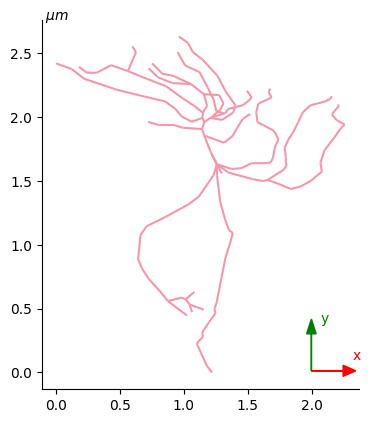

In [15]:
normalizer = TreeNormalizer()
normalized_tree = normalizer(tree)
_, _ = draw(normalized_tree)

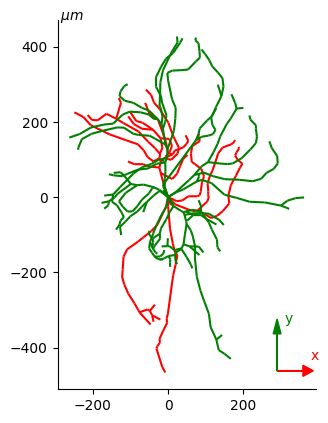

In [14]:
fig, ax = plt.subplots(1,1)
draw(swcgeom.Tree.from_swc(swc1), ax=ax, color="red")
draw(swcgeom.Tree.from_swc(swc2), ax=ax, color="green", first=False)
plt.show()